## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 12
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '4', '16'],
    'data_type': 'text',
    'max_batch_size': ['1', '4', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_vairants': ['resnet18', 'resnet34', 'resnet50', 'resnet101'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 12,
    'series_meta': 'checking the effect of batch size under 20 arrival '
                   'rate,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ '
                   '2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 10, 20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,1,17.100135,976.668030,14.459721
1,resnet18,1,1,1,NaN,1445.746891,NaN
2,resnet18,1,1,4,0.501752,23.372687,0.263209
3,resnet18,1,1,4,0.500577,135.032766,0.215878
4,resnet18,1,1,16,0.214583,17.552259,0.102765
5,resnet18,1,1,16,0.202519,85.961155,0.100604
6,resnet18,4,1,1,26.200346,151.575832,20.426937
7,resnet18,4,1,1,23.199376,624.601982,19.878394
8,resnet18,4,1,4,2.005911,21.444083,0.792981
9,resnet18,4,1,4,2.698733,135.682332,0.851403


Text(0, 0.5, 'Latency (seconds)')

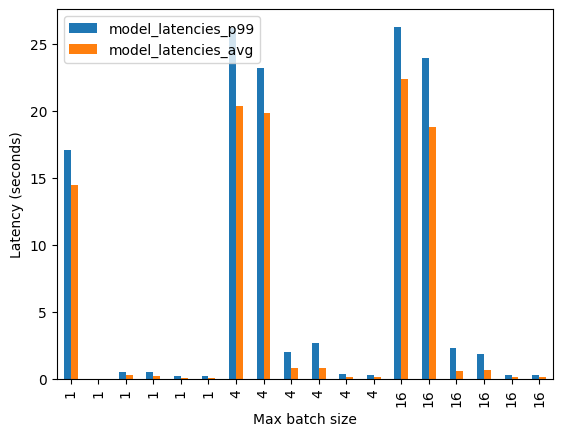

In [4]:
model_variant = 'resnet18'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet34,1,1,1,7.139956,156.876179,5.346052
1,resnet34,1,1,1,7.885435,469.910219,4.288434
2,resnet34,1,1,4,1.281289,31.766172,0.703123
3,resnet34,1,1,4,0.703728,219.568361,0.342628
4,resnet34,1,1,16,0.281589,26.344977,0.125581
5,resnet34,1,1,16,0.207467,113.428599,0.112557
6,resnet34,4,1,1,40.301827,156.314237,32.036760
7,resnet34,4,1,1,NaN,656.932810,NaN
8,resnet34,4,1,4,2.003146,28.126176,0.961429
9,resnet34,4,1,4,2.031122,179.160124,1.016856


Text(0, 0.5, 'Latency (seconds)')

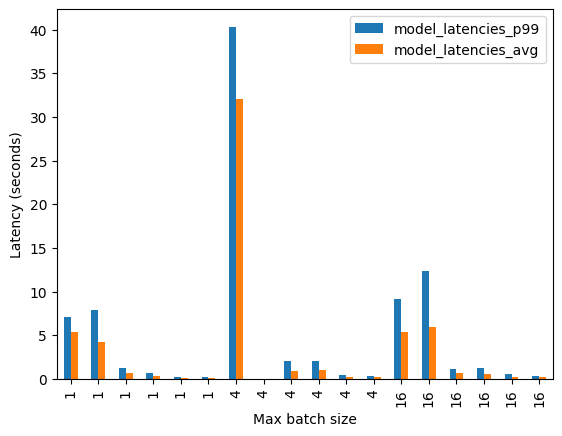

In [5]:
model_variant = 'resnet34'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet34,1,1,1,7.139956,156.876179,5.346052
1,resnet34,1,1,1,7.885435,469.910219,4.288434
2,resnet34,1,1,4,1.281289,31.766172,0.703123
3,resnet34,1,1,4,0.703728,219.568361,0.342628
4,resnet34,1,1,16,0.281589,26.344977,0.125581
5,resnet34,1,1,16,0.207467,113.428599,0.112557
6,resnet34,4,1,1,40.301827,156.314237,32.036760
7,resnet34,4,1,1,NaN,656.932810,NaN
8,resnet34,4,1,4,2.003146,28.126176,0.961429
9,resnet34,4,1,4,2.031122,179.160124,1.016856


Text(0, 0.5, 'Latency (seconds)')

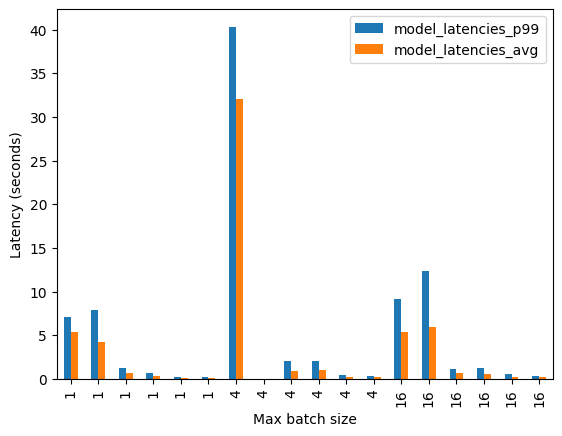

In [6]:
model_variant = 'resnet34'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet101,1,1,1,102.097701,209.724883,100.290071
1,resnet101,1,1,1,NaN,691.763617,NaN
2,resnet101,1,1,4,8.917593,190.386223,2.412792
3,resnet101,1,1,4,4.044885,749.171011,1.780181
4,resnet101,1,1,16,0.345088,33.075964,0.162678
5,resnet101,1,1,16,0.265481,177.933339,0.148782
6,resnet101,4,1,1,36.647913,188.267699,16.549528
7,resnet101,4,1,1,20.295207,638.705422,13.832163
8,resnet101,4,1,4,3.207026,48.789571,2.035248
9,resnet101,4,1,4,3.593684,298.693053,1.690128


Text(0, 0.5, 'Latency (seconds)')

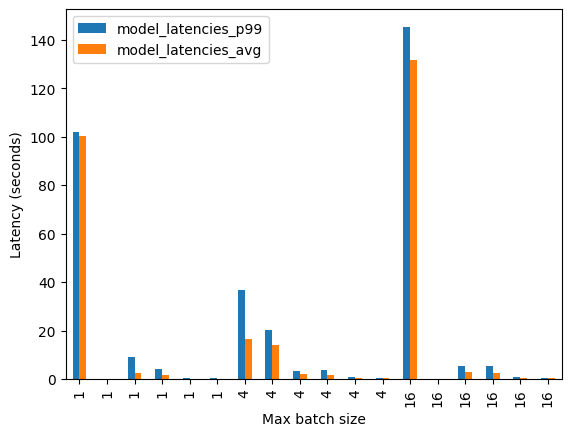

In [7]:
model_variant = 'resnet101'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

In [9]:
# TODO 3D images here